In [1]:
import numpy as np 
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences #pad_sequences is used to ensure that all sequences in a list have the same length. By default this is done by padding 0 in the beginning of each sequence until each sequence has the same length as the longest sequence.
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SimpleRNN
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from keras.utils.np_utils import to_categorical  #to convert an integer label into a vector 
import re #to use regular expression. Regular expressions are usually used for string matching
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import glob
from nltk.text import Text
%matplotlib inline

Using TensorFlow backend.


In [2]:
data = pd.read_csv('landslides.csv', error_bad_lines=False)

b'Skipping line 15856: expected 2 fields, saw 3\n'


In [3]:
#data2=pd.read_csv('earthquake.csv')
#data=data.append(data2)

In [4]:
len(data)

33957

In [5]:
data.head(500)

,text,label
0,@ms_landslide absolument ! :),NONE
1,Someday you will find me caught beneath the la...,NONE
2,@SportsComm25 nope Howard is leaving probably ...,NONE
3,Landslide by Fleetwood Mac came on the radio o...,NONE
4,When ever I hear the song landslide I think of...,NONE
5,@AwesomeStiffler @JoseCanseco @AROD best tweet...,NONE
6,An American girl in my group got up for cultur...,NONE
7,Someday you will find me caught beneath the la...,NONE
8,@dcox21 Sorry. I just said Stevie Nicks becaus...,NONE
9,Is this the real life? Is this just fantasy? C...,NONE


In [6]:
set(data['label'])

{'LANDSLIDE', 'NONE', nan}

In [7]:
data1 = data[(data['label'] == 'LANDSLIDE')]
data2=data[(data['label'] == 'NONE')]


In [8]:
len(data1)

13050

In [9]:
len(data)

33957

In [10]:
len(data2)

20906

In [11]:
data=data1.append(data2)

In [12]:
len(data)

33956

In [13]:
set(data['label'])

{'LANDSLIDE', 'NONE'}

In [14]:
print(len(data[data['label']=='LANDSLIDE']))
print(len(data[data['label']=='NONE']))

13050
20906


In [15]:
def tweet_to_words(raw_tweet):
    letters_only = re.sub("[^a-zA-Z0-9]", " ",raw_tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words )) 

In [16]:
data['text'] = data['text'].apply(lambda x: tweet_to_words(x))

In [17]:
data['text']

127      damage severe flooding hit north georgia lands...
189      dtn indonesia search ambon landslide victims c...
239      landslide myanmar myanmar floods leave 33000 c...
743      rt trowafoxg landslide indonesia kills four bu...
748      landslide india uttarakhand floods u00e2 u20ac...
779      landslide india 18228 cattle killed 20000 hect...
783      landslide philippines ndrrmc update situationa...
789      landslide disrupted road reopened se myanmar h...
796      landslide disrupted road reopened se myanmar h...
797      landslide disrupted road reopened se myanmar m...
800      landslide india landslides claim nine lives ke...
801      rt ugandawire 350 feared dead uganda landslide...
802      350 feared dead uganda landslide news round mu...
808      kochi august 5 nine people died several others...
820      landslide idukki 15 killed several reported mi...
822      landslide idukki 15 killed several reported mi...
824      check suryaray landslide idukki 15 killed seve.

In [18]:
for i in range(len(data)):
    data['text'][i] = data['text'][i].replace('rt ','')

In [85]:
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()
tok_data=[]
for row in data['text']:
    tok_data.append(tknzr.tokenize(row))

In [89]:
tokens=[]
for r in tok_data:
    for w in r:
        tokens.append(w)

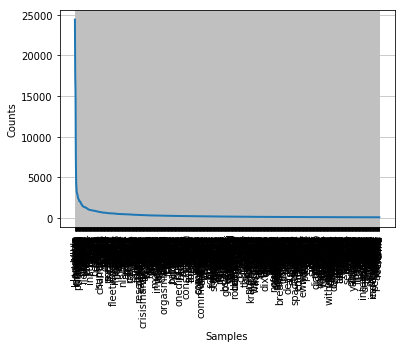

In [90]:
t=Text(tokens)
t.plot(1000)

In [95]:
len(tokens)

604384

In [22]:
data.head()

,text,label
127,damage severe flooding hit north georgia lands...,LANDSLIDE
189,dtn indonesia search ambon landslide victims c...,LANDSLIDE
239,landslide myanmar myanmar floods leave 33000 c...,LANDSLIDE
743,trowafoxg landslide indonesia kills four burie...,LANDSLIDE
748,landslide india uttarakhand floods u00e2 u20ac...,LANDSLIDE


In [75]:
max_fatures = 50000
tokenizer = Tokenizer(nb_words=max_fatures, split=' ')
tokenizer.fit_on_texts(data['text'].values)

In [76]:
#tokenizer.word_index["damage"]

In [77]:
X = tokenizer.texts_to_sequences(data['text'].values)
X = pad_sequences(X, padding = 'post')

In [78]:
len(X[0])

3458

In [99]:
le = preprocessing.LabelEncoder()
y = data['label'].tolist()
Y = le.fit_transform(y)
Y = to_categorical(Y)

In [100]:
embed_dim = 500
hidden_layer = 100

In [101]:
model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1], dropout=0.2))
#model.add(SimpleRNN(hidden_layer, dropout_U=0.2, dropout_W=0.2))
model.add(SimpleRNN(hidden_layer))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

/home/aindriya/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: UserWarning: The `dropout` argument is no longer support in `Embedding`. You can apply a `keras.layers.SpatialDropout1D` layer right after the `Embedding` layer to get the same behavior.
  


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 3458, 500)         302192000 
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 100)               60100     
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 202       
Total params: 302,252,302
Trainable params: 302,252,302
Non-trainable params: 0
_________________________________________________________________
None


In [102]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.30, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(23769, 3458) (23769, 2)
(10187, 3458) (10187, 2)


In [ ]:
batch_size = 32
model.fit(X_train, Y_train, epochs = 10, batch_size=batch_size)

/home/aindriya/.local/lib/python3.5/site-packages/tensorflow/python/ops/gradients_impl.py:105: UserWarning: Converting sparse IndexedSlices to a dense Tensor with 302192000 elements. This may consume a large amount of memory.
  num_elements)


Epoch 1/10


In [ ]:
score,acc = model.evaluate(X_test, Y_test, verbose = 2, batch_size = batch_size)
print("score: %.4f" % (score))
print("acc: %.2f" % (acc*100))

In [ ]:
test = data['text'][0]
test = tweet_to_words(test)
test = test.replace('rt ','')
test = [test]
test = tokenizer.texts_to_sequences(test)
test = pad_sequences(test, maxlen=24, padding = 'post')

In [ ]:
class_label = model.predict_classes(test)
print(le.inverse_transform(class_label))

In [ ]:
model.predict(test)

In [ ]:
from keras import backend as K

get_layer_output = K.function([model.layers[0].input],
                                  [model.layers[0].output])
layer_output = get_layer_output([X])[0]

In [ ]:
print(layer_output)